In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

%matplotlib inline

font_options = {'family' : 'monospace'}
figure_options = {'figsize':[8,5]}

plt.rc('font', **font_options) 
plt.rc('figure', **figure_options)

Вероятность принадлежности к классу

$$ P(y = 1 | x, w) = \sigma(x, w) $$

Логистическая функция потерь

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

## Логистическая регрессия
Для вывода логической регрессии удобнее рассматривать бинарную классификацию, где метки классов лежат во множестве $\{0, 1\}$. 

Задачу обучения логистической регрессии можно записать следующим образом:

$$ L(y, p)  \to \min_w$$

Обучение в данном случае сводится к нахождению параметров модели $w$, которое производится с помощью метода градиентного спуска (Gradient Descent, GD). 

Градиентный шаг будет заключаться в обновлении вектора весов по следующей формуле:

$$w := w - \eta X^T (p - y)$$

где $\eta > 0$ — размер шага (learning rate).

Выведем функцию связи через биномиальное распределение через задачу классификации:

$y \in \{0,1\}$ 
$$g^{-1}(p) = \overline{\theta}^T \overline{X}$$
$$f(y) = e^{\frac{y\alpha-c(\alpha)}{\varphi}+h(y,\varphi)}$$

Плотность биномиального распределения:
$$f(y) = p^y(1-p)^{1-y} = exp(y\log p + (1-y)\log(1-p)) = exp(y\log\frac{p}{1-p}+\log(1-p)\equiv c(\alpha)$$
$$\alpha  = \log \frac{p}{1-p} = g(p) = \overline{\theta}^T \overline{X}$$
$$\frac{p}{1-p} = e^{\overline{\theta}^T \overline{X}}$$
$$p = \sigma\left(\overline{\theta}^T \overline{X}\right) = \frac{1}{1+e^{-\overline{\theta}^T \overline{X}}}$$

Осталось получить функционал качества для задачи классификации. Функция называется \textsc{логистической сигмоидой}. Данная функция преобразует линейную комбинацию в интервал $[0,1]$. Дальнейшее значение целевой переменной мы будем предсказывать в качестве:
$$\hat{y} = \sigma\left(\overline{\theta}^T \overline{X}\right)$$

Функционал качества найдём через метод максимального правдоподобия:
$$p(x,y,p) = \prod\limits_{i=1}^l p_i^{y_i}(1-p_i)^{1-y_i} \xrightarrow[\theta]{}\max $$
$$\sum\limits_{i=1}^l y_i \log p_i + (1-y_i)\log(1-p_i)  \xrightarrow[\theta]{}\max$$

Функция потерь называется \textsc{LogLoss}:
$$LogLoss = L(x_i) = y_i \log p_i - (1-y_i)\log p_i  \xrightarrow[\theta]{}\min, p_i = \sigma(x_i)$$

Если мы правильно предсказываем отношение принадлежности класса к $1$, то функция потерь будет равна нулю, если правильно предсказываем $0$ правильно, то тоже $0$, а если $1$ - правильный ответ, а $0$ - нет, то ошибка будет $+\infty$, и ошибку ограничивают значениями $100$, чтобы ошибка не уходила далеко.
$$p = \sigma\left(\overline{\theta}^T \overline{X}\right) \in [0,1]$$
$$L = -y\log p - (1-y)\log(1-p)$$

In [2]:
class LogisticRegressionGD:
    '''
    Logistic Regression
    '''
    
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
            return matrix X_ext = [1, X]:
        """
        poly = PolynomialFeatures(1)
        return poly.fit_transform(X)
    
    def init_weights(self, input_size, output_size):
        """
            initialising model params
        """
        np.random.seed(42)
        self.W = np.random.normal(0.0, 0.01, (input_size, output_size))
        return self.W
        
    def get_loss(self, p, y):
        """
            return log_loss
        """
        return -1 / len(y)*np.sum((y * np.log(p) + (1 - y) * np.log(1 - p)))
        
    
    def get_prob(self, X, W):
        """
            sigmoid function
        """
        def sigmoid(h):
            return 1. / (1 + np.exp(-h))
        
        def logit(x, w):
            return np.dot(x, w)
        
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        
        return sigmoid(logit(X, W))
    
    def get_weight(self):
        '''
        return parameters of model
        '''
        return self.W
    
    def grad(self, f, x, eps = 2**(-24)) -> np.array:
        '''
        return gradient of function
        '''
        value = np.array([f(x + dx) - f(x) for dx in eps * np.eye(x.shape[0])])
        return value / eps
    
    def binary(self,X, y):
        s = lambda p: -1/len(y)*np.sum((y * np.log(self.get_prob(X,p)) + (1 - y) * np.log(1 - self.get_prob(X,p))))
        return s
    
    def grad_descent(self,X, y, iterations = 100, learning_rate = 0.01):
        
        '''
        return fitted params and polyfeatures matrix _XT
        '''
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])

        for _ in range(iterations):
            p = self.get_prob(X,self.W)
            self.W -= (self.grad(f = self.binary(X, y), x = self.W)*learning_rate).reshape(-1,1)
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            losses.append(log_loss)

        return losses

    def fit(self, X, y, iterations=100, learning_rate=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        losses = []
        for _ in range(iterations):
            p = self.get_prob(X,self.W)

            W_grad = X.T @ (p - y) / y.shape[0]
            self.W -= learning_rate * W_grad
            
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
        return losses

In [3]:
data = pd.read_csv("data/binary_classification.csv")
X = data.iloc[:, :2].values
y = data.y.values[:, np.newaxis]
n = 10000
model = LogisticRegressionGD()
losses = model.fit(X, y, iterations = n,learning_rate=0.2)

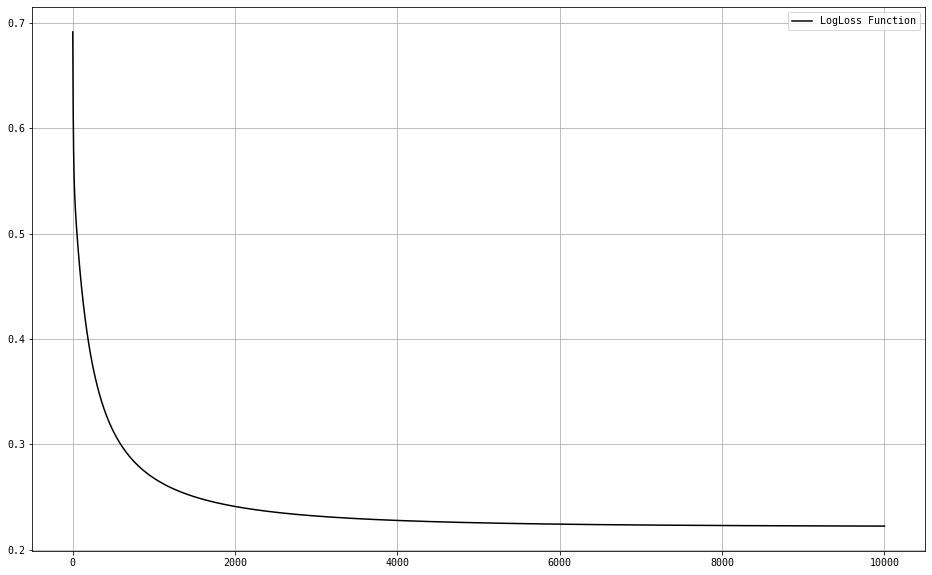

In [4]:
fig, ax = plt.subplots(figsize = (16,10),sharex=True,sharey=True,frameon = False)
ax.plot(losses, label=f'LogLoss Function',color = 'black')
plt.legend()
plt.grid()
plt.show()